# Using shapefiles to mask Countries in Cordex Data on rotated grids

based on https://gitlab.dkrz.de/m300524/intake_taking_the_pain_out_of_data_access/-/blob/master/demo_intake.ipynb

In [30]:
url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"

In [27]:
import geopandas as gpd
import regionmask

In [31]:
#capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
#world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
country_shp = gpd.read_file(url)

In [32]:
country_shp

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,마카오,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [33]:
country_regions = regionmask.from_geopandas(country_shp, names='NAME_EN',abbrevs='_from_name')

In [36]:
country_regions

<regionmask.Regions>
Name:     unnamed

Regions:
   0          Ind0                    Indonesia
   1          Mal0                     Malaysia
   2           Chi                        Chile
   3           Bol                      Bolivia
   4           Per                         Peru
...            ...                          ...
 250           Mac                        Macau
 251  AshandCarIsl  Ashmore and Cartier Islands
 252     BajNueBan              Bajo Nuevo Bank
 253        SerBan              Serranilla Bank
 254        ScaSho            Scarborough Shoal

[255 regions]

<GeoAxesSubplot:>

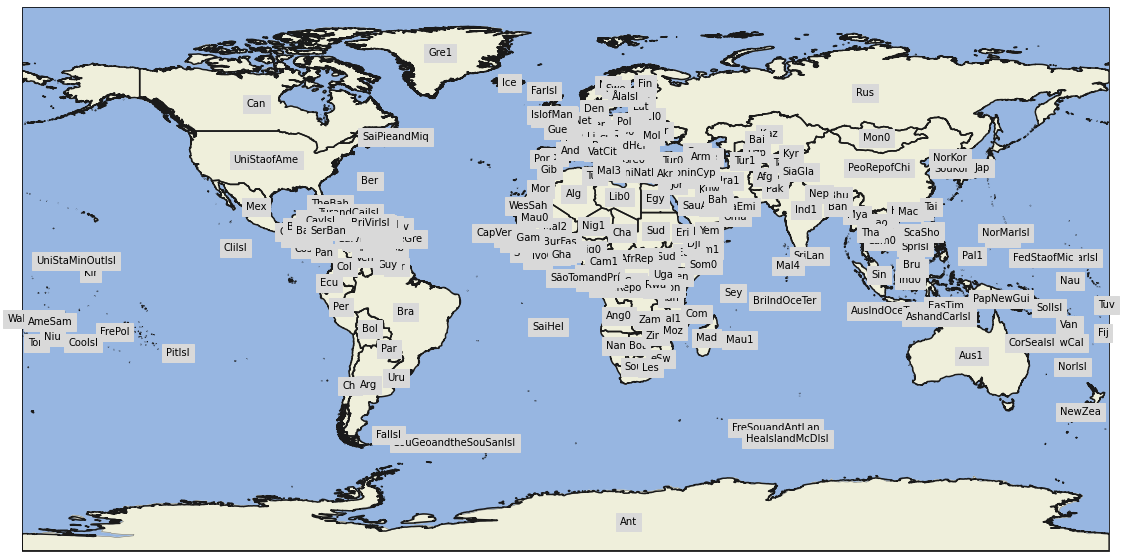

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(25,10))
country_regions.plot(label='abbrev',add_land=True, add_ocean=True)

In [40]:
import intake
cat = intake.open_catalog('https://raw.githubusercontent.com/aaronspring/remote_climate_data/master/master.yaml')
hadcrut = cat.atmosphere.HadCRUT4.to_dask()

In [43]:
import hvplot.xarray
cat.atmosphere.HadCRUT4.plots

['temperature_anomaly_over_time', 'GMSTa']

In [59]:
mask = country_regions.mask(hadcrut, lon_name='longitude',lat_name='latitude')

In [67]:
mask

<xarray.DataArray 'region' (latitude: 36, longitude: 72)>
array([[172., 172., 172., ..., 172., 172., 172.],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ..., 172.,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5

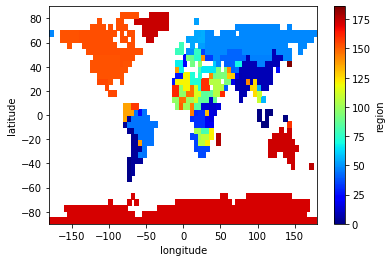

In [50]:
mask.plot(cmap='jet')

In [64]:
hadcrut

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2049)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) object 1850-01-16 12:00:00 ... 2020-09-16 00:...
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 dask.array<chunksize=(2049, 36, 72), meta=np.ndarray>
    field_status         (time) |S1 dask.array<chunksize=(2049,), meta=np.ndarray>
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 27/10/2020 11:20:18
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0

In [65]:
hadcrut.groupby(mask)

DatasetGroupBy, grouped over 'region' 
103 groups with labels 0.0, 1.0, 2.0, ..., 178.0, 186.0.

In [52]:
hadcrut_country = hadcrut.groupby(mask).mean('stacked_latitude_longitude')

In [58]:
hadcrut_country

<xarray.Dataset>
Dimensions:              (region: 103, time: 2049)
Coordinates:
  * time                 (time) object 1850-01-16 12:00:00 ... 2020-09-16 00:...
  * region               (region) float64 0.0 1.0 2.0 3.0 ... 176.0 178.0 186.0
Data variables:
    temperature_anomaly  (region, time) float32 dask.array<chunksize=(1, 2049), meta=np.ndarray>

In [61]:
def set_regionmask_labels(ds, region):
    """Set names as region label for region dimension from regionmask regions."""
    abbrevs = region[ds.region.values].abbrevs
    names = region[ds.region.values].names
    ds.coords["abbrevs"] = ("region", abbrevs)
    ds.coords["number"] = ("region", ds.region.values)
    ds["region"] = names
    return ds

hadcrut_country = set_regionmask_labels(hadcrut_country, country_regions)
hadcrut_country.coords

Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2020-09-16 00:00:00
  * region   (region) <U32 'Indonesia' 'Malaysia' ... 'Madagascar' 'Japan'
    abbrevs  (region) <U14 'Ind0' 'Mal0' 'Chi' 'Bol' ... 'NewZea' 'Mad' 'Jap'
    number   (region) float64 0.0 1.0 2.0 3.0 4.0 ... 174.0 176.0 178.0 186.0

In [119]:
hadcrut_country.temperature_anomaly

<xarray.DataArray 'temperature_anomaly' (region: 103, time: 2049)>
dask.array<concatenate, shape=(103, 2049), dtype=float32, chunksize=(1, 2049), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2020-09-16 00:00:00
  * region   (region) <U32 'Indonesia' 'Malaysia' ... 'Madagascar' 'Japan'
    abbrevs  (region) <U14 'Ind0' 'Mal0' 'Chi' 'Bol' ... 'NewZea' 'Mad' 'Jap'
    number   (region) float64 0.0 1.0 2.0 3.0 4.0 ... 174.0 176.0 178.0 186.0

/work/ch0636/g300046/conda_envs/dask/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


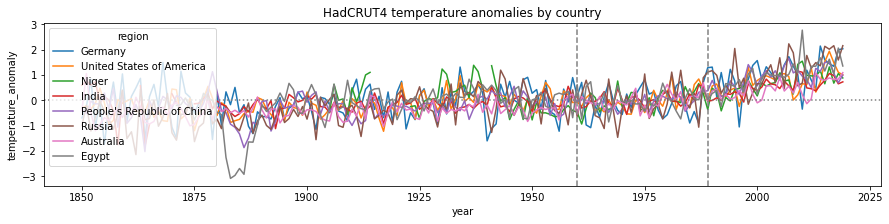

In [63]:
 # plot yearmean until 2019 temperature record per country
regions = ['Germany','United States of America','Niger','India',"People's Republic of China",'Russia','Australia','Egypt']
hadcrut_country.sel(region=regions).sel(time=slice(None,'2019')).groupby('time.year').mean().temperature_anomaly.plot(hue='region',figsize=(15,3))
plt.title('HadCRUT4 temperature anomalies by country')
plt.axhline(y=0,c='gray',ls=':')
plt.axvline(x=1960,c='gray',ls='--')
plt.axvline(x=1989,c='gray',ls='--')
plt.show()

In [68]:
import xarray as xr

In [69]:
tas = xr.open_mfdataset('/pool/data/CORDEX/data/cordex/output/EUR-11/GERICS/ECMWF-ERAINT/evaluation/r1i1p1/GERICS-REMO2015/v1/mon/tas/v20180813/tas_EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_mon_*')

In [88]:
tas

<xarray.Dataset>
Dimensions:                     (bnds: 2, rlat: 412, rlon: 424, time: 407, vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1979-02-15 ... 2012-12-...
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.72 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.16
    lat                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    height                      float64 2.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(23, 2), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    lat_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(23, 412, 424, 4), meta=np.ndarray>
    lon_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(23, 412, 424, 4), meta=np.ndarray>
    tas                         (time, rlat, rlon) float32 dask.array<chunksize=(23, 412, 424), meta=np.ndarray>
Attributes:
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  evaluation
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    contact:                        gerics-cordex@hzg.de
    comment:                        CORDEX Europe RCM REMO 0.11 deg EUR-11.
    references:                     http://www.remo-rcm.de/
    initialization_method:          1
    physics_version:                1
    tracking_id:                    07c8a6b9-424a-4867-815c-5fbce2675d0b
    CORDEX_domain:                  EUR-11
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    driving_model_id:               ECMWF-ERAINT
    driving_model_ensemble_member:  r1i1p1
    driving_experiment_name:        evaluation
    rcm_version_id:                 v1
    product:                        output
    experiment:                     Evaluation run with reanalysis forcing
    frequency:                      mon
    creation_date:                  2018-06-15T15:20:54Z
    history:                        2018-06-15T15:20:54Z CMOR rewrote data to...
    Conventions:                    CF-1.4
    project_id:                     CORDEX
    table_id:                       Table mon (Mar 2015) db0b230ff4a2c922671f...
    title:                          GERICS-REMO2015 model output prepared for...
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1

In [71]:
mask = country_regions.mask(tas, lon_name='lon',lat_name='lat')

In [95]:
mask

<xarray.DataArray 'group' (rlat: 412, rlon: 424)>
array([[162., 162., 162., ...,  nan,  nan,  nan],
       [162., 162., 162., ...,  nan,  nan,  nan],
       [162., 162., 162., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan, 174., ...,  48.,  48.,  48.],
       [174., 174., 174., ...,  48.,  48.,  48.],
       [174., 174., 174., ...,  48.,  48.,  48.]])
Coordinates:
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.61 21.72 21.84
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.93 18.04 18.16
    lat      (rlat, rlon) float32 22.018326 22.058432 ... 66.82695 66.76481
    lon      (rlat, rlon) float32 -10.137466 -10.037447 ... 64.741615 64.94712

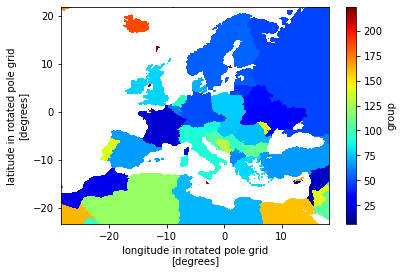

In [102]:
mask.plot(cmap='jet')

In [103]:
mask

<xarray.DataArray 'group' (rlat: 412, rlon: 424)>
array([[162., 162., 162., ...,  nan,  nan,  nan],
       [162., 162., 162., ...,  nan,  nan,  nan],
       [162., 162., 162., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan, 174., ...,  48.,  48.,  48.],
       [174., 174., 174., ...,  48.,  48.,  48.],
       [174., 174., 174., ...,  48.,  48.,  48.]])
Coordinates:
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.61 21.72 21.84
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.93 18.04 18.16
    lat      (rlat, rlon) float32 22.018326 22.058432 ... 66.82695 66.76481
    lon      (rlat, rlon) float32 -10.137466 -10.037447 ... 64.741615 64.94712

In [100]:
tas_country = tas.groupby(mask).mean('stacked_rlat_rlon')

In [101]:
tas.groupby(mask)

DatasetGroupBy, grouped over 'group' 
70 groups with labels 6.0, 7.0, 10.0, ..., 223.0, 224.0.

In [120]:
tas_country

<xarray.Dataset>
Dimensions:                     (group: 70, region: 70, time: 407, vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1979-02-15 ... 2012-12-...
    height                      float64 2.0
  * group                       (group) float64 6.0 7.0 10.0 ... 223.0 224.0
    abbrevs                     (region) <U17 'DheCan' 'Cyp' ... 'FarIsl'
    number                      (region) float64 6.0 7.0 10.0 ... 223.0 224.0
  * region                      (region) <U36 'Dhekelia Cantonment' ... 'Faro...
Dimensions without coordinates: vertices
Data variables:
    rotated_latitude_longitude  (group, time) float64 -2.147e+09 ... -2.147e+09
    lat_vertices                (group, time, vertices) float32 dask.array<chunksize=(1, 23, 4), meta=np.ndarray>
    lon_vertices                (group, time, vertices) float32 dask.array<chunksize=(1, 23, 4), meta=np.ndarray>
    tas                         (group, time) float32 dask.array<chunksize=(1, 23), meta=np.ndarray>

In [121]:
def set_regionmask_labels(ds, region):
    """Set names as region label for region dimension from regionmask regions."""
    abbrevs = region[ds.group.values].abbrevs
    names = region[ds.group.values].names
    ds.coords["abbrevs"] = ("group", abbrevs)
    ds.coords["number"] = ("group", ds.group.values)
    ds["group"] = names
    return ds

eur_country = set_regionmask_labels(tas_country, country_regions)
eur_country.coords

Coordinates:
  * time     (time) datetime64[ns] 1979-02-15 ... 2012-12-16T12:00:00
    height   float64 2.0
  * group    (group) <U36 'Dhekelia Cantonment' 'Cyprus' ... 'Faroe Islands'
    abbrevs  (group) <U17 'DheCan' 'Cyp' 'Isr' ... 'IslofMan' 'ÅlaIsl' 'FarIsl'
    number   (group) float64 6.0 7.0 10.0 11.0 12.0 ... 221.0 222.0 223.0 224.0
  * region   (region) <U36 'Dhekelia Cantonment' 'Cyprus' ... 'Faroe Islands'

In [129]:
eur_country.group.values

array(['Dhekelia Cantonment', 'Cyprus', 'Israel', 'Palestine', 'Lebanon',
       'Syria', 'France', 'Morocco', 'Western Sahara', 'Ukraine',
       'Belarus', 'Lithuania', 'Russia', 'Czech Republic', 'Germany',
       'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Luxembourg',
       'Belgium', 'Georgia', 'Republic of Macedonia', 'Albania', 'Kosovo',
       'Turkey', 'Spain', 'Denmark', 'Libya', 'Tunisia', 'Romania',
       'Hungary', 'Slovakia', 'Poland', 'Ireland', 'United Kingdom',
       'Greece', 'Austria', 'Iraq', 'Italy', 'Switzerland', 'Netherlands',
       'Liechtenstein', 'Serbia', 'Mali', 'Croatia', 'Slovenia',
       'Saudi Arabia', 'Bulgaria', 'Algeria', 'Andorra', 'Montenegro',
       'Bosnia and Herzegovina', 'Portugal', 'Moldova', 'Jordan', 'Egypt',
       'Mauritania', 'Turkish Republic of Northern Cyprus',
       'United Nations Buffer Zone in Cyprus', 'Akrotiri', 'Greenland',
       'Iceland', 'Malta', 'Jersey', 'Guernsey', 'Isle of Man',
       'Åland Islands',

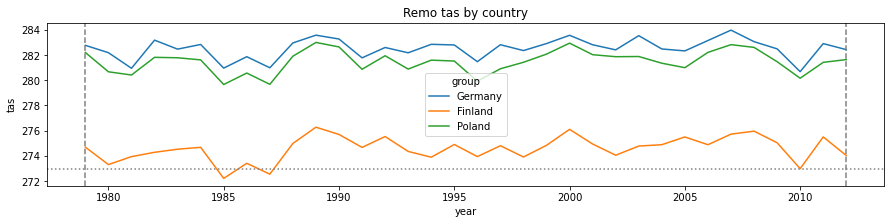

In [135]:
 # plot yearmean until 2019 temperature record per country
#regions = list(eur_country.group.values)
regions = ['Germany', 'Finland', 'Poland']
eur_country.sel(group=regions).sel(time=slice(None,'2012')).groupby('time.year').mean().tas.plot(hue='group',figsize=(15,3))
plt.title('Remo tas by country')
plt.axhline(y=273,c='gray',ls=':')
plt.axvline(x=1979,c='gray',ls='--')
plt.axvline(x=2012,c='gray',ls='--')
plt.show()